In [1]:
import pandas as pd
from lifelines.utils import survival_table_from_events
from lifelines import KaplanMeierFitter
import numpy as np

In [9]:
df = pd.read_csv("training_data.csv")

C:\Users\devas\AppData\Local\Temp\ipykernel_6968\3902838423.py:1: DtypeWarning: Columns (51) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("training_data.csv")


In [10]:
df.head()

,financial_active,net_payment_behaviour_tripd,promotion_flag,variable_rate_index,account_status_code,active_12_mths,bank_fico_buckets_20,charge_off_reason_code,mob,open_closed_flag,...,due_balance_2,due_balance_3,due_balance_4,due_balance_5,due_balance_6,due_balance_7,due_balance_8,snapshot,mth_code,industry
0,1.0,P,0,0,I 0-6,1.0,581-600,NaN,3,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,201801,201807,B
1,0.0,P,0,0,I 0-6,1.0,721-740,NaN,159,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,201801,201906,C
2,1.0,T,0,0,I 7-12,1.0,761+,NaN,22,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,201801,201905,A
3,1.0,T,0,1,I 0-6,1.0,761+,NaN,16,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,201801,201806,B
4,1.0,P,0,0,A,0.0,721-740,NaN,3,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,201801,201902,B


In [11]:
print(len(df.columns))
df.columns

69


Index(['financial_active', 'net_payment_behaviour_tripd', 'promotion_flag',
       'variable_rate_index', 'account_status_code', 'active_12_mths',
       'bank_fico_buckets_20', 'charge_off_reason_code', 'mob',
       'open_closed_flag', 'ever_delinquent_flg', 'nbr_mths_due',
       'variable_rate_margin', 'stmt_balance', 'prev_balance', 'net_sales',
       'net_payments', 'purchase_active', 'credit_limit_amt',
       'credit_limit_pa', 'closed', 'active', 'charge_off', 'charge_off_aged',
       'charge_off_bk', 'principal_amt', 'principal_amt_chrg_off',
       'total_writeoff_amt', 'fee_chg_off_reversal_amt', 'net_finance_charge',
       'non_principal_amount_gross', 'non_principal_amount_net',
       'non_principal_amount_stmt', 'aged_writeoff_amt',
       'bankruptcy_writeoff_amt', 'fc_reversals', 'fee_reversals',
       'fraud_writeoff_amt', 'other_writeoff_amt', 'promo_bal_amt',
       'recovery_amt', 'writeoff_type_bko', 'writeoff_type_fraud_kiting',
       'writeoff_type_fraud_s

In [12]:
def add_survival_time(df_train): 
    df_train['survival_time'] = df_train.apply(lambda row: row["mth_code"] - row["snapshot"] if row["mth_code"] // 100 == row["snapshot"] // 100 else (row["mth_code"] % 100) - (row["snapshot"] % 100) + 12, axis=1)
    return df_train

In [13]:
def sort_by_mth_and_snapshot(df_train):
    df_train = df_train.sort_values(by=["snapshot"], ascending = True)
    df_train = df_train.sort_values(by=["mth_code"], ascending = True)
    return df_train

In [150]:
df_train_head = df[df.snapshot == 201801]
df_train_head = add_survival_time(df_train_head)
df_train_head = sort_by_mth_and_snapshot(df_train_head)
df_train_head

C:\Users\devas\AppData\Local\Temp\ipykernel_23916\87456177.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['survival_time'] = df_train.apply(lambda row: row["mth_code"] - row["snapshot"] if row["mth_code"] // 100 == row["snapshot"] // 100 else (row["mth_code"] % 100) - (row["snapshot"] % 100) + 12, axis=1)


,financial_active,net_payment_behaviour_tripd,promotion_flag,variable_rate_index,account_status_code,active_12_mths,bank_fico_buckets_20,charge_off_reason_code,mob,open_closed_flag,...,due_balance_3,due_balance_4,due_balance_5,due_balance_6,due_balance_7,due_balance_8,snapshot,mth_code,industry,survival_time
228279,0.0,I,0,0,A,1.0,741-760,NaN,21,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,201801,201801,B,0
16556,1.0,I,0,0,A,1.0,661-680,NaN,47,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,201801,201801,A,0
16591,0.0,I,0,0,I 0-6,1.0,641-660,NaN,16,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,201801,201801,A,0
16583,1.0,I,0,1,I 7-12,1.0,761+,NaN,40,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,201801,201801,B,0
318446,1.0,I,0,1,I 7-12,0.0,681-700,NaN,30,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,201801,201801,A,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231981,0.0,I,0,0,A,1.0,681-700,NaN,37,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,201801,201912,B,23
232011,1.0,T,0,0,I 0-6,1.0,761+,NaN,33,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,201801,201912,B,23
224173,1.0,I,1,0,A,1.0,701-720,NaN,2,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,201801,201912,C,23
314057,1.0,P,0,1,I 7-12,1.0,761+,NaN,27,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,201801,201912,A,23


In [14]:
df = add_survival_time(df)
df = sort_by_mth_and_snapshot(df)
df

,financial_active,net_payment_behaviour_tripd,promotion_flag,variable_rate_index,account_status_code,active_12_mths,bank_fico_buckets_20,charge_off_reason_code,mob,open_closed_flag,...,due_balance_3,due_balance_4,due_balance_5,due_balance_6,due_balance_7,due_balance_8,snapshot,mth_code,industry,survival_time
499348,1.0,I,0,0,A,0.0,681-700,NaN,22,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,201801,201801,B,0
96353,1.0,P,0,0,A,1.0,701-720,NaN,5,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,201801,201801,B,0
129354,1.0,I,0,0,A,1.0,761+,NaN,89,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,201801,201801,B,0
213447,1.0,P,0,1,A,1.0,741-760,NaN,15,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,201801,201801,B,0
96339,1.0,T,0,0,A,1.0,601-620,NaN,37,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,201801,201801,C,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4022381,1.0,P,0,0,A,1.0,761+,NaN,241,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,201812,201912,B,12
5415149,1.0,P,0,0,A,1.0,761+,NaN,28,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,201907,201912,C,5
2453303,0.0,P,1,0,A,1.0,761+,NaN,64,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,201806,201912,B,18
2453193,0.0,T,0,0,A,1.0,701-720,NaN,36,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,201806,201912,C,18


In [15]:
def get_uniques(df_train):
    df_train['max_survival_time'] = df_train.apply(lambda row: 201912 - row['snapshot'] if row['snapshot'] // 100 == 2019 else (201912 % 100) - (row['snapshot'] % 100) + 12, axis=1)
    df_train = df_train[(df_train.charge_off == 1) | (df_train.survival_time == df_train.max_survival_time)]
    return df_train

In [16]:
df = get_uniques(df)
df

,financial_active,net_payment_behaviour_tripd,promotion_flag,variable_rate_index,account_status_code,active_12_mths,bank_fico_buckets_20,charge_off_reason_code,mob,open_closed_flag,...,due_balance_4,due_balance_5,due_balance_6,due_balance_7,due_balance_8,snapshot,mth_code,industry,survival_time,max_survival_time
337821,1.0,D,1,0,A,1.0,661-680,NaN,46,0.0,...,0.0,0.0,0.0,0.0,0.0,201801,201802,A,1,23
337841,1.0,D,1,0,A,1.0,661-680,NaN,81,1.0,...,0.0,0.0,0.0,0.0,0.0,201801,201802,B,1,23
337833,1.0,D,1,0,A,1.0,621-640,NaN,16,1.0,...,0.0,0.0,0.0,0.0,0.0,201801,201802,B,1,23
337832,1.0,D,1,0,A,1.0,<= 560,NaN,18,1.0,...,0.0,0.0,0.0,0.0,0.0,201801,201802,A,1,23
337952,1.0,R,0,0,A,1.0,721-740,NaN,162,1.0,...,0.0,0.0,0.0,0.0,0.0,201801,201802,B,1,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4022381,1.0,P,0,0,A,1.0,761+,NaN,241,1.0,...,0.0,0.0,0.0,0.0,0.0,201812,201912,B,12,12
5415149,1.0,P,0,0,A,1.0,761+,NaN,28,1.0,...,0.0,0.0,0.0,0.0,0.0,201907,201912,C,5,5
2453303,0.0,P,1,0,A,1.0,761+,NaN,64,1.0,...,0.0,0.0,0.0,0.0,0.0,201806,201912,B,18,18
2453193,0.0,T,0,0,A,1.0,701-720,NaN,36,1.0,...,0.0,0.0,0.0,0.0,0.0,201806,201912,C,18,18


In [152]:
print(df_train_head.shape)
column_lst = ["charge_off", "snapshot", "mth_code", "survival_time"]
df_train_short = df_train_head[column_lst]
df_train_short

(456559, 70)


,charge_off,snapshot,mth_code,survival_time
228279,0,201801,201801,0
16556,0,201801,201801,0
16591,0,201801,201801,0
16583,0,201801,201801,0
318446,0,201801,201801,0
...,...,...,...,...
231981,0,201801,201912,23
232011,0,201801,201912,23
224173,0,201801,201912,23
314057,0,201801,201912,23


In [153]:
df_train_short[(df_train_short.charge_off == 1) | ((df_train_short.charge_off == 0) & (df_train_short.survival_time == 23))]

,charge_off,snapshot,mth_code,survival_time
339134,1,201801,201802,1
339112,1,201801,201802,1
339009,1,201801,201802,1
339074,1,201801,201802,1
338968,1,201801,201802,1
...,...,...,...,...
231981,0,201801,201912,23
232011,0,201801,201912,23
224173,0,201801,201912,23
314057,0,201801,201912,23


In [154]:
df_train_short = get_uniques(df_train_short)
df_train_short

C:\Users\devas\AppData\Local\Temp\ipykernel_23916\2881033101.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['max_survival_time'] = df_train.apply(lambda row: 201912 - row['snapshot'] if row['snapshot'] // 100 == 2019 else (201912 % 100) - (row['snapshot'] % 100) + 12, axis=1)


,charge_off,snapshot,mth_code,survival_time,max_survival_time
339134,1,201801,201802,1,23
339112,1,201801,201802,1,23
339009,1,201801,201802,1,23
339074,1,201801,201802,1,23
338968,1,201801,201802,1,23
...,...,...,...,...,...
231981,0,201801,201912,23,23
232011,0,201801,201912,23,23
224173,0,201801,201912,23,23
314057,0,201801,201912,23,23


In [158]:
df_train_head['month_num'] = np.where(df_train_head['mth_code'] // 100 == 2018, df_train_head['mth_code'] % 100, df_train_head['mth_code'] % 100 + 12)
df_train_head

,financial_active,net_payment_behaviour_tripd,promotion_flag,variable_rate_index,account_status_code,active_12_mths,bank_fico_buckets_20,charge_off_reason_code,mob,open_closed_flag,...,due_balance_4,due_balance_5,due_balance_6,due_balance_7,due_balance_8,snapshot,mth_code,industry,survival_time,month_num
228279,0.0,I,0,0,A,1.0,741-760,NaN,21,1.0,...,0.0,0.0,0.0,0.0,0.0,201801,201801,B,0,1
16556,1.0,I,0,0,A,1.0,661-680,NaN,47,1.0,...,0.0,0.0,0.0,0.0,0.0,201801,201801,A,0,1
16591,0.0,I,0,0,I 0-6,1.0,641-660,NaN,16,1.0,...,0.0,0.0,0.0,0.0,0.0,201801,201801,A,0,1
16583,1.0,I,0,1,I 7-12,1.0,761+,NaN,40,1.0,...,0.0,0.0,0.0,0.0,0.0,201801,201801,B,0,1
318446,1.0,I,0,1,I 7-12,0.0,681-700,NaN,30,1.0,...,0.0,0.0,0.0,0.0,0.0,201801,201801,A,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231981,0.0,I,0,0,A,1.0,681-700,NaN,37,1.0,...,0.0,0.0,0.0,0.0,0.0,201801,201912,B,23,24
232011,1.0,T,0,0,I 0-6,1.0,761+,NaN,33,1.0,...,0.0,0.0,0.0,0.0,0.0,201801,201912,B,23,24
224173,1.0,I,1,0,A,1.0,701-720,NaN,2,1.0,...,0.0,0.0,0.0,0.0,0.0,201801,201912,C,23,24
314057,1.0,P,0,1,I 7-12,1.0,761+,NaN,27,1.0,...,0.0,0.0,0.0,0.0,0.0,201801,201912,A,23,24


<AxesSubplot:xlabel='timeline'>

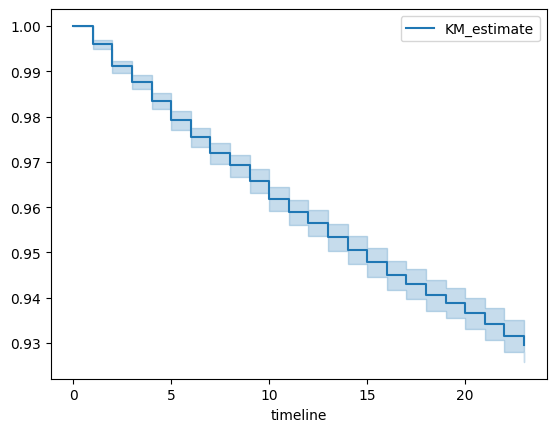

In [18]:
kmf = KaplanMeierFitter()
kmf.fit(df[df.snapshot == 201801]["survival_time"], event_observed = df[df.snapshot == 201801]["charge_off"])
survival_curve = kmf.survival_function_
kmf.plot()